This file is aimed towards beginners who are starting in the filed of deep learning and provides a step to step introduction to building a image classifier. This notebook uses the problem and dataset described in the [Deep Learning Beginner Challenge.](https://www.hackerearth.com/challenge/competitive/deep-learning-beginner-challenge/) at [HackerEarth](https://www.hackerearth.com/challenges/). 

### Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from glob import glob
%matplotlib inline

### Data Exploration 

In [2]:
# Reading the train and test csv files 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Image_id,Animal
0,Img-1.jpg,hippopotamus
1,Img-2.jpg,squirrel
2,Img-3.jpg,grizzly+bear
3,Img-4.jpg,ox
4,Img-5.jpg,german+shepherd


In [4]:
# Number of images in the training and the test datasets. 
print('There are {} images in the train dataset.'.format(train.shape[0]))
print('There are {} images in the test datasets.'.format(test.shape[0]))

There are 13000 images in the train dataset.
There are 6000 images in the test datasets.


In [5]:
# Number of unique animals in the datasets
print('There are {} unique animals in the dataset.'.format(train.Animal.unique().shape[0]))

There are 30 unique animals in the dataset.


Lets see which Animals are there in the dataset.

In [6]:
print('The dataset contain images of the following animals:\n\n', train.Animal.unique())

The dataset contain images of the following animals:

 ['hippopotamus' 'squirrel' 'grizzly+bear' 'ox' 'german+shepherd' 'buffalo'
 'otter' 'bobcat' 'wolf' 'persian+cat' 'collie' 'antelope' 'seal'
 'dalmatian' 'siamese+cat' 'moose' 'horse' 'killer+whale' 'mouse' 'walrus'
 'beaver' 'rhinoceros' 'chimpanzee' 'weasel' 'spider+monkey' 'raccoon'
 'rat' 'chihuahua' 'mole' 'bat']


### Data Visualization

Now, that we have explored our dataset, let's implement some data visualization techniques to get a better understand of the data.

We will first start by analysing the frequency distribution of the animal images in the training data.

In [7]:
animal_count = pd.value_counts(train.Animal)

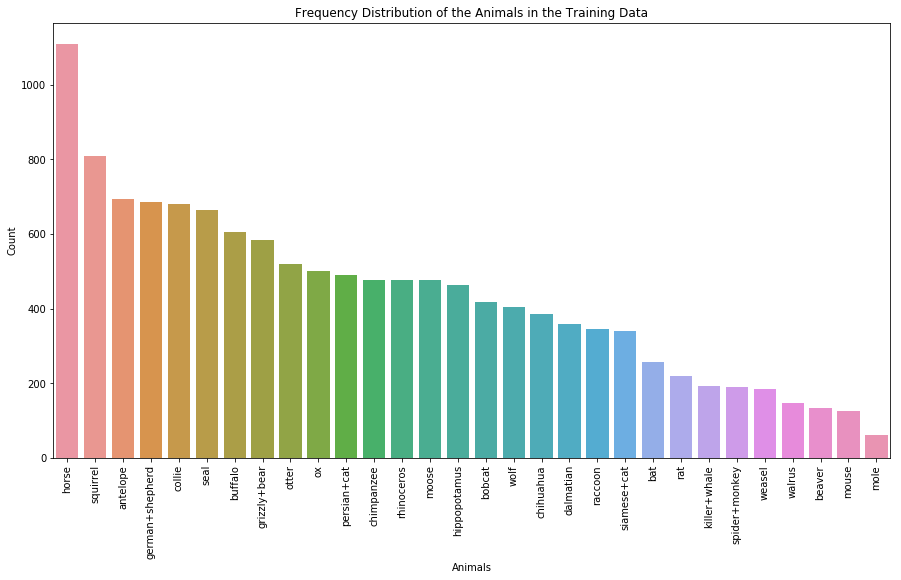

In [8]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=animal_count.index, y=animal_count.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
ax.set_title('Frequency Distribution of the Animals in the Training Data')
ax.set(xlabel='Animals', ylabel='Count')
plt.show()

From the above distribution, we can infer that the animal 'horse' have the largest number of images in the dataset while 'mole' has the least number of images.

The distribution of the animals is skewed i.e. the classes to predict are unbalanced in the dataset. 

In [9]:
### Checking for any null values in the labels 
labels  =  train.Animal
labels.isnull().any()

False

Now, let's visulize the Images in the training data.

In [10]:
### Train adn Test image folder paths

TRAIN_PATH = 'train/' 
TEST_PATH = 'test/'

Importing OpenCV and Python Image library for image manipulation.

In [11]:
### Importing Python Image Library and Opencv library
from PIL import Image
import cv2

Animal:  hippopotamus


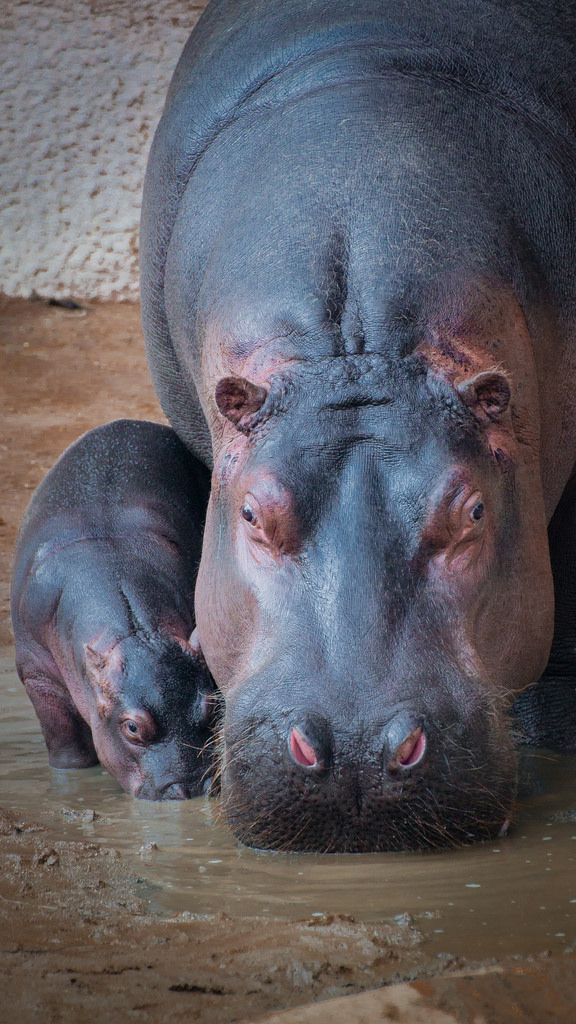

In [12]:
print('Animal: ',train.Animal[0])
Image.open(TRAIN_PATH + train.Image_id[0])

Using PIL(Python Image Library) Image function we can directly, view the Image stored in the given path. 

Now, let's use OpenCV to read the Image.

In [13]:
img = cv2.imread(TRAIN_PATH+train.Image_id[0])

We used the OpenCV 'imread' function and read the image stored at index zero of the train data.

Now, let's look how the computer interprets the image.

In [14]:
img

array([[[101, 103, 113],
        [ 96,  98, 108],
        [101, 103, 113],
        ...,
        [ 50,  45,  42],
        [ 48,  43,  40],
        [ 29,  24,  21]],

       [[105, 106, 116],
        [104, 106, 116],
        [110, 112, 122],
        ...,
        [ 48,  41,  38],
        [ 52,  45,  42],
        [ 49,  42,  39]],

       [[ 97,  98, 108],
        [ 98,  99, 109],
        [107, 108, 118],
        ...,
        [ 55,  48,  45],
        [ 48,  39,  36],
        [ 46,  37,  34]],

       ...,

       [[ 51,  64,  80],
        [ 49,  62,  78],
        [ 48,  61,  75],
        ...,
        [ 46,  60,  78],
        [ 46,  62,  79],
        [ 46,  62,  79]],

       [[ 50,  62,  74],
        [ 49,  60,  74],
        [ 49,  60,  74],
        ...,
        [ 44,  58,  76],
        [ 45,  59,  77],
        [ 45,  59,  77]],

       [[ 54,  63,  76],
        [ 52,  64,  76],
        [ 52,  64,  76],
        ...,
        [ 43,  57,  75],
        [ 44,  59,  75],
        [ 43,  58,  74]]

The computer cannot see shapes or colors. It reads an image as an array of numbers.

Next, we will check the dimensions of this array. 

In [15]:
### Shape of the image.
img.shape

(1024, 576, 3)

So, the computer inteprets the image as a three dimensional array of 1024 rows and 576 columns and with depth 3.  Each value in this array represents a pixel in the image, lying in the range (0 - 255). The depth 3 represents the RGB spectrum in the image. 

### Data Preprocessing 

Next, we will perform some preprocessing on the image data before supplying them to the training model.

In [16]:
### Displaying the image dimensions of the first five images in the training dataset. 
sample = train.head()
for idx in sample.Image_id:
    img = cv2.imread(TRAIN_PATH + idx)
    print('{} : {}'.format(idx, img.shape))

Img-1.jpg : (1024, 576, 3)
Img-2.jpg : (771, 1024, 3)
Img-3.jpg : (683, 1024, 3)
Img-4.jpg : (681, 1024, 3)
Img-5.jpg : (500, 332, 3)


We can see that all the images have different dimesions. But neural networks expect arrays of uniform dimensions as input. Therefore, we will resize the images in the dataset to the dimensions : (224 x 224 x 3)

In [17]:
### Creating a function to resize the images in the training data.
from tqdm import tqdm
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    return img

The above function reads an image and resizes it to 224 x 224 dimensions and returns it. 

In [18]:
#temp = train.sample(frac=0.3)
#train = temp.reset_index(drop=True)

In [19]:
train_img = []
for img_path in tqdm(train.Image_id.values):
    train_img.append(read_img(TRAIN_PATH + img_path))

100%|██████████| 13000/13000 [04:09<00:00, 52.07it/s]


In [20]:
import gc

Next, we will rescale the images in the training data. We will scale the width and height of each image so that each pixel value lies in the range of [0 - 1]. We will rescale each image by dividing it by 255. 

In [21]:
# Convert the image data into an array. 
# Since the range of color(RGB) is in the range of (0-255).
# Hence by dividing each image by 255, we convert the range to (0.0 - 1.0)

X_train = np.array(train_img, np.float32) / 255.

In [22]:
del train_img
gc.collect()

19

Next, we will calculate the mean and standard deviation of the images in the training dataset.

In [23]:
mean_img = X_train.mean(axis = 0)

In [24]:
std_dev = X_train.std(axis = 0)

Next, we will normalize the image data using the following formula: 

<center>** X = (x - mean of x)/(std. deviation of x)**<center/>

Normalization helps us to standardize the input values. Standardizing the inputs can make training faster and reduce the chances of getting stuck in local minima. Also, we like the features to haves similar ranges so that our gradients don't go out of control.

In [25]:
X_norm = (X_train - mean_img)/ std_dev

In [26]:
X_norm.shape

(13000, 224, 224, 3)

In [27]:
del X_train
gc.collect()

0

Next we label encode the lables in the train data. Label Encoding is used to transform non-numerical labels or categporical labels to numerical lables. 

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
lb = LabelEncoder()
lb.fit(train.Animal.values)
y = lb.transform(train.Animal.values)

In [30]:
from sklearn.model_selection import train_test_split

Finally, we create the training and validation sets. 

In [31]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_norm, y, test_size=0.15, random_state=47)

In [32]:
del X_norm
gc.collect()

0

### Model Architecture


We will use the Keras framework to create our model. 

In [34]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

Next, we will one-hot encode the labels before supplying them to the model. Since label encoding (a.k.a integer encoding) will have a ordinal relationship between them. But for categorical variables where no such ordinall relationship exists, the integer encoding is not enough. In this case, one-hot encoding can be applied to the integer representation, where the integer enocoded variable is removed and a new binary variable is added for each unique integer value.  

In [35]:
#### One hot encoding labels.
ytrain = np_utils.to_categorical(ytrain)
yvalid = np_utils.to_categorical(yvalid)

We will build a model from scratch. We will use a Sequential model, which is a linear stack of layers, to build this model. 

In [36]:
model = Sequential()
model.add(BatchNormalization(input_shape = Xtrain.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(30, activation='softmax'))

In [37]:
### Generating a summary of the model.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 218, 218, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 109, 109, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 107, 107, 128)     73856     
__________

There are approximately 11 million parameters to train. 

Next, we will define the loss function and the optimizer for the model.

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
early_stops = EarlyStopping(patience=5, monitor='val_acc')
checkpointer = ModelCheckpoint(filepath='weights.best.eda.hdf5', verbose=1, save_best_only=True)

In [40]:
model.fit(Xtrain, ytrain, validation_data=(Xvalid, yvalid), epochs=2, batch_size=16, verbose=1)

Train on 11050 samples, validate on 1950 samples
Epoch 1/2


 3248/11050 [=======>......................] - ETA: 1:24:57 - loss: 3.3900 - acc: 0.06 - ETA: 46:11 - loss: 7.9609 - acc: 0.0312 - ETA: 33:17 - loss: 8.5263 - acc: 0.02 - ETA: 26:48 - loss: 7.3060 - acc: 0.03 - ETA: 22:56 - loss: 6.5157 - acc: 0.07 - ETA: 20:20 - loss: 5.9981 - acc: 0.06 - ETA: 18:29 - loss: 5.6101 - acc: 0.08 - ETA: 17:06 - loss: 5.3189 - acc: 0.07 - ETA: 16:01 - loss: 5.1139 - acc: 0.06 - ETA: 15:09 - loss: 4.9429 - acc: 0.06 - ETA: 14:25 - loss: 4.8146 - acc: 0.06 - ETA: 13:49 - loss: 4.6858 - acc: 0.07 - ETA: 13:18 - loss: 4.5819 - acc: 0.07 - ETA: 12:53 - loss: 4.4939 - acc: 0.06 - ETA: 12:31 - loss: 4.4108 - acc: 0.07 - ETA: 12:11 - loss: 4.3465 - acc: 0.07 - ETA: 11:54 - loss: 4.2832 - acc: 0.06 - ETA: 11:38 - loss: 4.2214 - acc: 0.07 - ETA: 11:23 - loss: 4.1797 - acc: 0.07 - ETA: 11:11 - loss: 4.1323 - acc: 0.08 - ETA: 10:59 - loss: 4.0947 - acc: 0.07 - ETA: 10:48 - loss: 4.0598 - acc: 0.07 - ETA: 10:38 - loss: 4.0257 - acc: 0.07 - ETA: 10:29 - loss: 3.9957 - a

11050/11050 [==============================] - ETA: 53s - loss: 3.3025 - acc: 0.08 - ETA: 52s - loss: 3.3024 - acc: 0.08 - ETA: 51s - loss: 3.3023 - acc: 0.08 - ETA: 51s - loss: 3.3021 - acc: 0.08 - ETA: 50s - loss: 3.3018 - acc: 0.08 - ETA: 49s - loss: 3.3019 - acc: 0.08 - ETA: 49s - loss: 3.3020 - acc: 0.08 - ETA: 48s - loss: 3.3020 - acc: 0.08 - ETA: 47s - loss: 3.3018 - acc: 0.08 - ETA: 47s - loss: 3.3017 - acc: 0.08 - ETA: 46s - loss: 3.3019 - acc: 0.08 - ETA: 45s - loss: 3.3018 - acc: 0.08 - ETA: 45s - loss: 3.3015 - acc: 0.08 - ETA: 44s - loss: 3.3013 - acc: 0.08 - ETA: 43s - loss: 3.3014 - acc: 0.08 - ETA: 42s - loss: 3.3012 - acc: 0.08 - ETA: 42s - loss: 3.3012 - acc: 0.08 - ETA: 41s - loss: 3.3010 - acc: 0.08 - ETA: 40s - loss: 3.3007 - acc: 0.08 - ETA: 40s - loss: 3.3005 - acc: 0.08 - ETA: 39s - loss: 3.3003 - acc: 0.08 - ETA: 38s - loss: 3.3000 - acc: 0.08 - ETA: 38s - loss: 3.3002 - acc: 0.08 - ETA: 37s - loss: 3.3004 - acc: 0.08 - ETA: 36s - loss: 3.2999 - acc: 0.08 - ETA

 3264/11050 [=======>......................] - ETA: 7:40 - loss: 3.0253 - acc: 0.187 - ETA: 7:38 - loss: 3.0894 - acc: 0.218 - ETA: 7:36 - loss: 3.1783 - acc: 0.145 - ETA: 7:35 - loss: 3.2227 - acc: 0.125 - ETA: 7:35 - loss: 3.2248 - acc: 0.100 - ETA: 7:35 - loss: 3.2315 - acc: 0.104 - ETA: 7:35 - loss: 3.2141 - acc: 0.098 - ETA: 7:34 - loss: 3.2193 - acc: 0.085 - ETA: 7:34 - loss: 3.2089 - acc: 0.090 - ETA: 7:33 - loss: 3.2133 - acc: 0.100 - ETA: 7:32 - loss: 3.2099 - acc: 0.102 - ETA: 7:31 - loss: 3.2311 - acc: 0.099 - ETA: 7:31 - loss: 3.2518 - acc: 0.091 - ETA: 7:30 - loss: 3.2396 - acc: 0.098 - ETA: 7:29 - loss: 3.2389 - acc: 0.100 - ETA: 7:28 - loss: 3.2312 - acc: 0.105 - ETA: 7:27 - loss: 3.2321 - acc: 0.099 - ETA: 7:26 - loss: 3.2375 - acc: 0.097 - ETA: 7:26 - loss: 3.2493 - acc: 0.092 - ETA: 7:25 - loss: 3.2525 - acc: 0.096 - ETA: 7:24 - loss: 3.2473 - acc: 0.101 - ETA: 7:23 - loss: 3.2472 - acc: 0.099 - ETA: 7:23 - loss: 3.2459 - acc: 0.097 - ETA: 7:22 - loss: 3.2398 - acc: 0

11050/11050 [==============================] - ETA: 51s - loss: 3.2348 - acc: 0.09 - ETA: 50s - loss: 3.2348 - acc: 0.09 - ETA: 49s - loss: 3.2346 - acc: 0.09 - ETA: 49s - loss: 3.2341 - acc: 0.09 - ETA: 48s - loss: 3.2342 - acc: 0.09 - ETA: 47s - loss: 3.2341 - acc: 0.09 - ETA: 47s - loss: 3.2336 - acc: 0.09 - ETA: 46s - loss: 3.2337 - acc: 0.09 - ETA: 45s - loss: 3.2339 - acc: 0.09 - ETA: 45s - loss: 3.2335 - acc: 0.09 - ETA: 44s - loss: 3.2329 - acc: 0.09 - ETA: 43s - loss: 3.2326 - acc: 0.09 - ETA: 43s - loss: 3.2323 - acc: 0.09 - ETA: 42s - loss: 3.2324 - acc: 0.09 - ETA: 41s - loss: 3.2325 - acc: 0.09 - ETA: 41s - loss: 3.2325 - acc: 0.09 - ETA: 40s - loss: 3.2322 - acc: 0.09 - ETA: 39s - loss: 3.2320 - acc: 0.09 - ETA: 39s - loss: 3.2313 - acc: 0.09 - ETA: 38s - loss: 3.2311 - acc: 0.09 - ETA: 37s - loss: 3.2306 - acc: 0.09 - ETA: 37s - loss: 3.2306 - acc: 0.09 - ETA: 36s - loss: 3.2304 - acc: 0.09 - ETA: 35s - loss: 3.2301 - acc: 0.09 - ETA: 35s - loss: 3.2299 - acc: 0.09 - ETA

In [41]:
model.save_weights('weights.best.eda.hdf5')

### Prediction on Test Set

Now that we have built and trained our model, we will use it to predict the labels on the test images. 

In [72]:
test_img = []
for img_path in tqdm(test.Image_id.values):
    test_img.append(read_img(TEST_PATH + img_path))

100%|██████████| 6000/6000 [02:00<00:00, 49.93it/s]


In [73]:
X_test = np.array(test_img, np.float32)/255.

In [74]:
del test_img
gc.collect()

9040

Performing normalization on the test images. 

In [75]:
X_norm_test = (X_test - mean_img) / std_dev

In [76]:
del X_test
gc.collect()

0

Predicting the labels on the test images.

In [92]:
y_test_pred = model.predict(X_norm_test)

In [112]:
### Creating the submission file
subm = pd.DataFrame()
subm['image_id'] = test.Image_id
label_df = pd.DataFrame(data=y_test_pred, columns=lb.classes_)

In [113]:
subm = pd.concat([subm, label_df], axis=1)

In [121]:
subm.to_csv('submission.csv', index=False)

The submission produces a score of 3.140. Remember that this score is the log-loss error and therefore a perfect model will have a score close to 0 . Hence this model can be further improved in many ways. A better model will be posted in future.

END......